<a href="https://colab.research.google.com/github/RebwarOmer/statics/blob/main/class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb New York
### Statistics Group A Project


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ab = pd.read_csv('AB_NYC_2019.csv')

## **Exploring the Dataset**

Before we perform any analysis, we'll first see what our dataset looks like. These are the variables it contains:

* id - id number that identifies the property
* name - Property name
* host_id - id number that identifies the host
* host_name - Host name
* neighbourhood_group - The main regions of the city
* neighbourhood - The neighbourhoods
* latitude - Property latitude
* longitude - Property longitude
* room_type - Type of the room
* price - The price for one night
* minimum_nights - Minimum amount of nights to book the place
* number_of_reviews - Number of reviews received
* last_review - Date of the last review
* reviews_per_month - Amount of reviews per month
* calculated_host_listings_count - Number of properties available on Airbnb owned by the host
* availability_365 - Number of days of availability within 365 days

Now let's display its first five rows.

In [ ]:
ab.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see the amount of data we have: 48895 rows and 16 columns.


We can see more statistical values by using the `describe` method on some relevant data

In [ ]:
ab[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### **Variable Distribution**

We'll now plot some histograms in order to see the distribution for each variable and start looking for outliers.

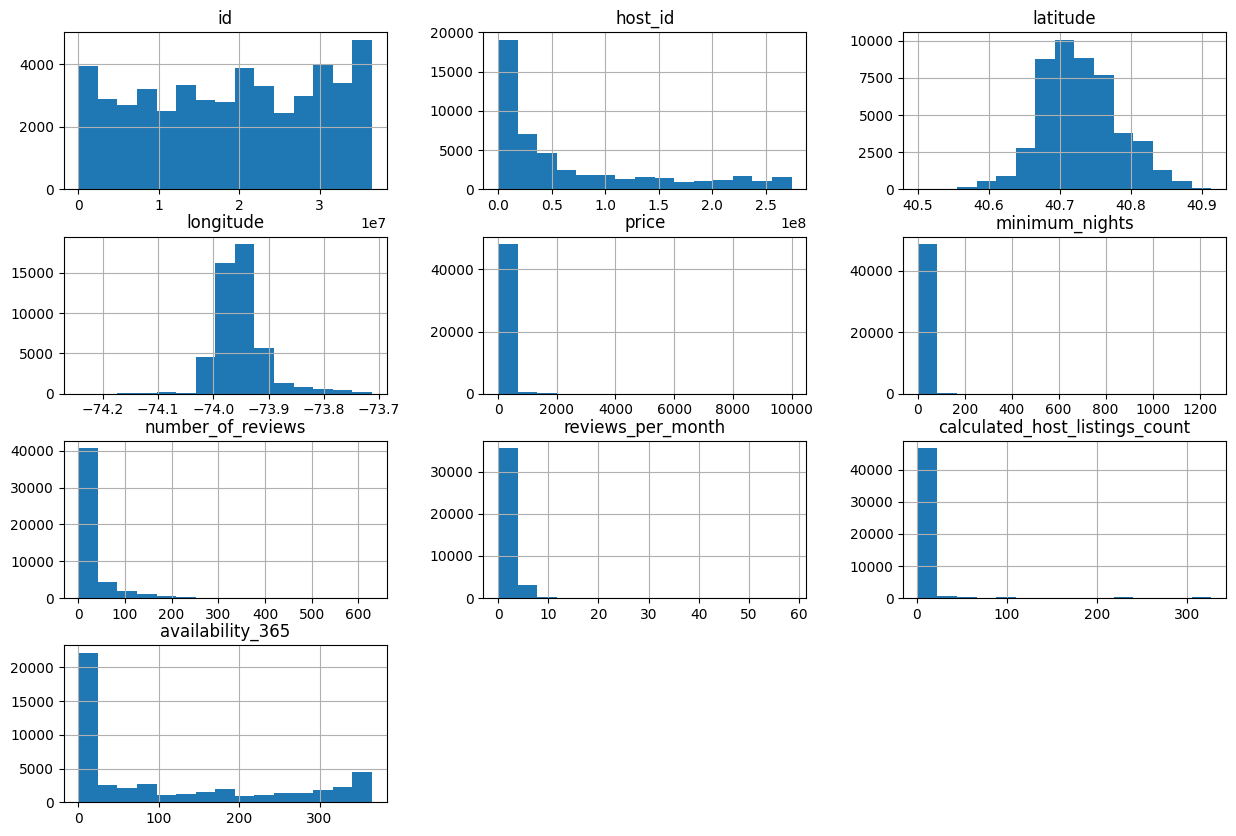

In [ ]:
ab.hist(bins=15, figsize=(15,10));

In [ ]:
# Displaying the box plot
# ab['price'].plot(kind='box', vert=False, figsize=(10,3))
# plt.show()

In [ ]:
# Calculating the number and the percentage of prices that are equal to $0 and over $250.00
print('Values over $250.00: ')
print(len(ab[ab['price'] > 250]))
print('{:.4f}%'.format((len(ab[ab['price'] > 250]) / ab.shape[0]) * 100))

Values over $250.00: 
5208
10.6514%


In [ ]:
# Displaying the box plot
# ab['minimum_nights'].plot(kind='box', vert=False, figsize=(10,3))
# plt.show()

In [ ]:
# Filtering minimum nights

print('Values over 10 nights: ')
print(len(ab[ab['minimum_nights'] > 10]))
print('{:.4f}%'.format((len(ab[ab['minimum_nights'] > 10]) / ab.shape[0]) * 100))

Values over 10 nights: 
6640
13.5801%


In [ ]:
# Calculating the number of rooms for each room type
room_type = ab['room_type'].value_counts().sort_values(ascending=False)
# Calculating the percentage of rooms for each room type
room_type_pct = round(ab['room_type'].value_counts(normalize=True)  * 100, 2)

# Displaying the results
print(room_type)
print('\n')
print(room_type_pct)
print('\n')

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


room_type
Entire home/apt    51.97
Private room       45.66
Shared room         2.37
Name: proportion, dtype: float64




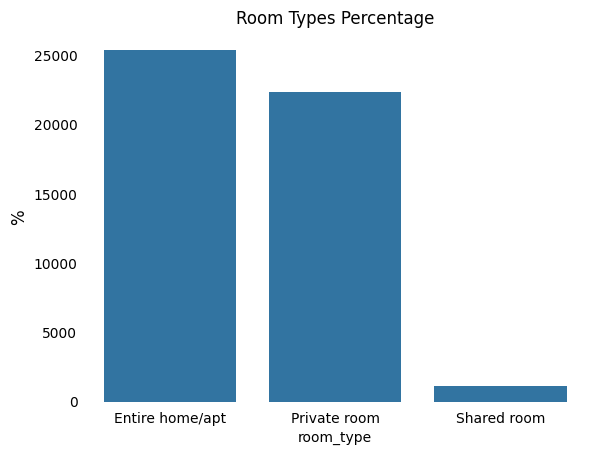

In [ ]:
# Plotting the percentage of rooms for each room type
ax = sns.barplot(x=room_type.index, y=room_type)
ax.set_title('Room Types Percentage')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

In [ ]:
# Calculating the average price per room type
type_price = round(ab.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

# Displaying the results
print(type_price)
print('\n')

room_type
Entire home/apt    211.79
Private room        89.78
Shared room         70.13
Name: price, dtype: float64




neighbourhood_group
Manhattan        196.88
Brooklyn         124.38
Staten Island    114.81
Queens            99.52
Bronx             87.50
Name: price, dtype: float64




/var/folders/1c/2bsd1rc564n6drnclt6d4g7m0000gn/T/ipykernel_5945/1904301024.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price_region.index, y=price_region, palette=sns.xkcd_palette(colors), legend=False)


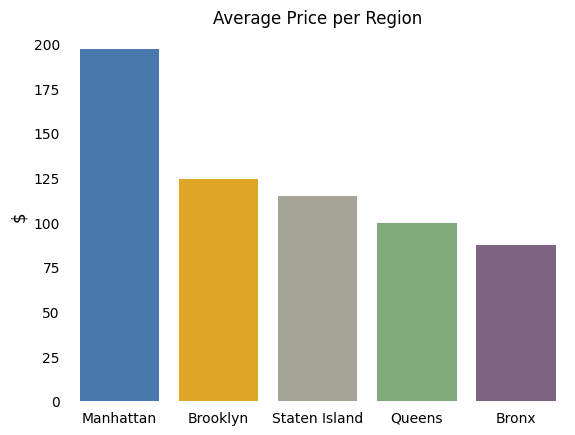

In [ ]:
# Calculating the average price per region
price_region = round(ab.groupby('neighbourhood_group').price.mean().sort_values(ascending=False), 2)

# Displaying the results
print(price_region)
print('\n')

# Plotting the average price per region
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

ax = sns.barplot(x=price_region.index, y=price_region, palette=sns.xkcd_palette(colors), legend=False)
ax.set_title('Average Price per Region')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

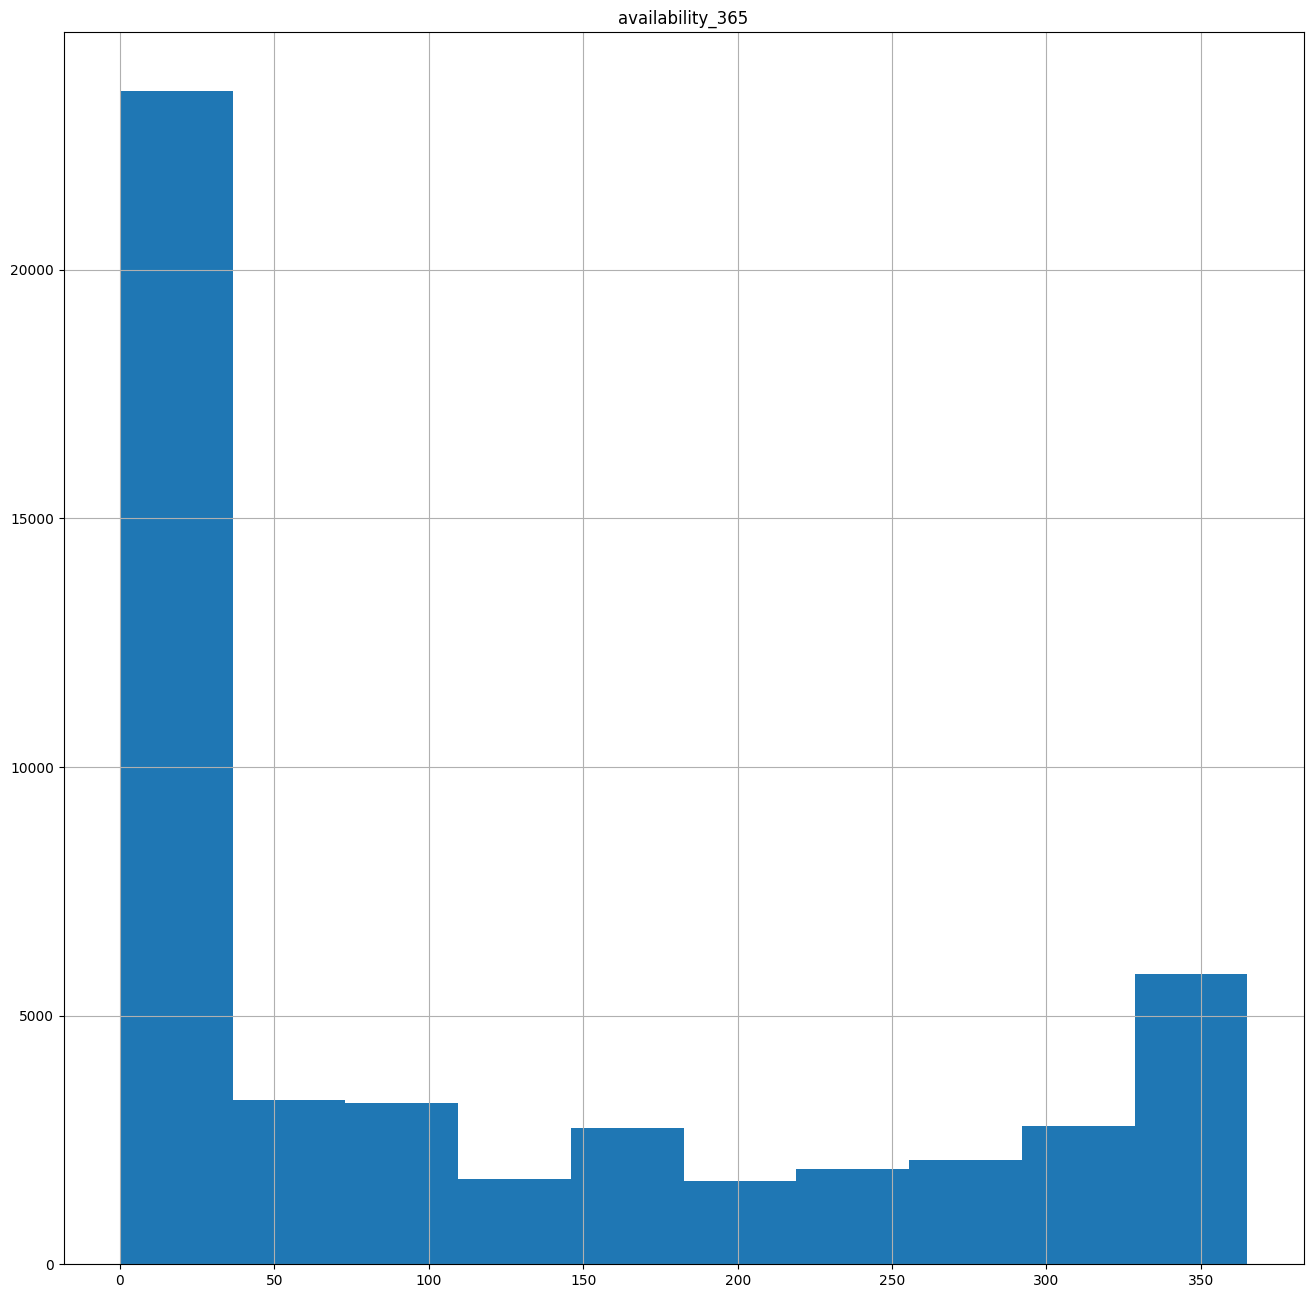

In [ ]:
# Availability in a year
ab.hist(['availability_365'], figsize=(16,16))
plt.show()

### Mean

In [ ]:
xbar = x.mean()
xbar

152.7206871868289

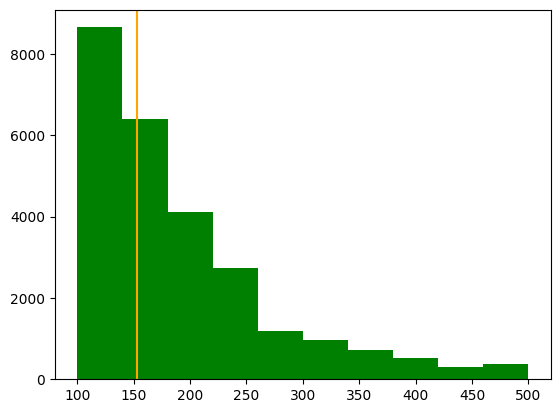

In [ ]:
 # plotting the mean of the price
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'green', range=(100,500))

### Median

In [ ]:
np.median(x)

106.0

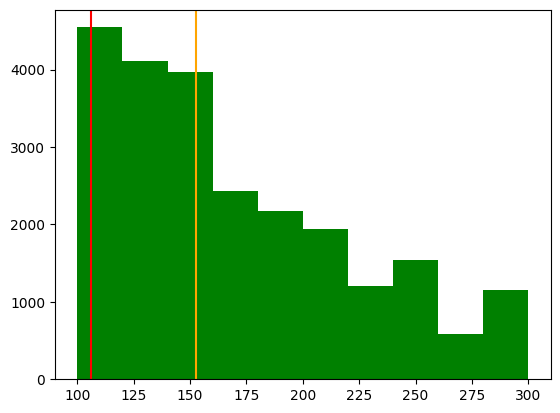

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='red')
_ = plt.hist(x, color = 'green', range=(100,300))

### Measures of Dispersion

In [ ]:
x.var()

57674.02524696099

#### Standard Deviation
$$ \sigma = \sqrt{\sigma^2} $$

In [ ]:
x.var()**(1/2)

240.15416974718758

In [ ]:
sigma = x.std()
sigma

240.15416974718758

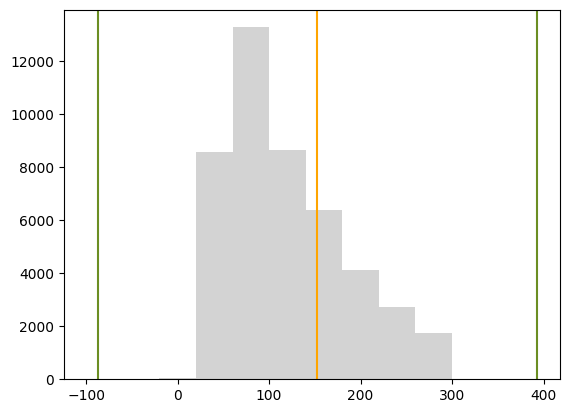

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab') # outlier
plt.axvline(x = xbar-sigma, color='olivedrab') # outlier
_ = plt.hist(x, color = 'lightgray', range=(-100, 300))

### Gaussian Distribution

In [ ]:
z = ab['price']
sns.set_style('ticks')

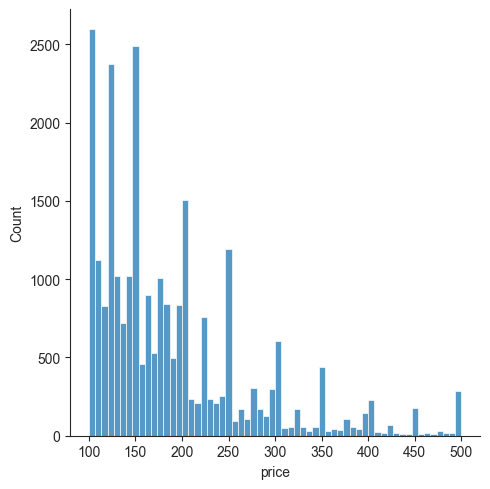

In [ ]:
_ = sns.displot(z, kde=False, binrange=(100, 500))

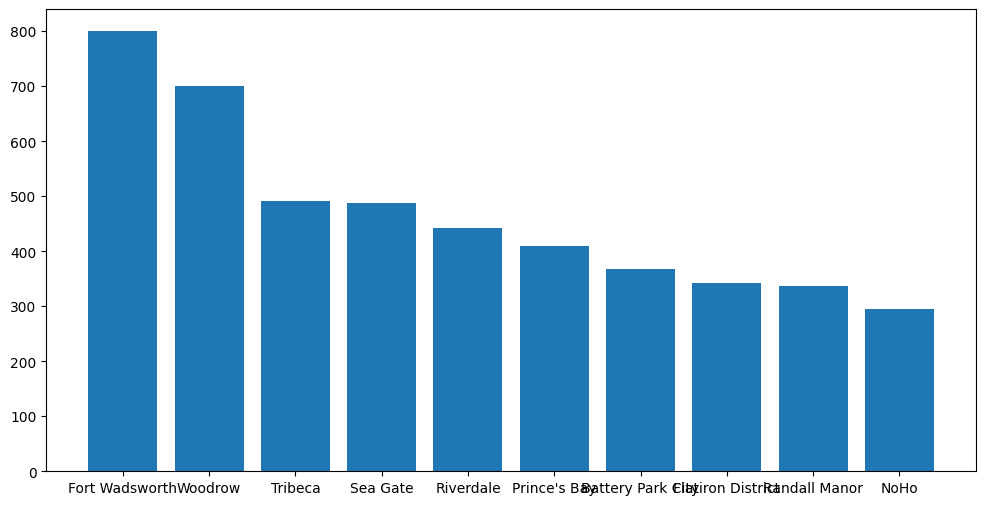

In [ ]:
neighbourhood_prices = ab.groupby('neighbourhood')['price'].mean()

# Sort by prices
top_10 = neighbourhood_prices.sort_values(ascending=False).head(10)

# Get neighbourhoods and prices
neighbourhoods = top_10.index
prices = top_10.values

plt.figure(figsize=(12, 6))

plt.bar(neighbourhoods, prices)
plt.show()

In [ ]:
# sns.pairplot(ab)